In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
path = 'raw-data'
csv_files = [file for file in os.listdir(path) if file.endswith('.csv')]

In [3]:
df = pd.DataFrame()
operations = []
suboperations = []
for csv_file in csv_files:
    parts = csv_file.split('_')
    operation = parts[0]
    suboperation = parts[1] if len(parts) > 1 else None
    other = '_'.join(parts[2:]) if len(parts) > 2 else None

    operations.append(operation)
    suboperations.append(suboperation)
    
    file_path = os.path.join(path, csv_file)
    data = pd.read_csv(file_path)

    data['Operation'] = operation
    data['Suboperation'] = suboperation
    data['Other'] = other
    
    # Adding CPU utilization
    data['cpu_util'] = ((data['sysDiff'] + data['userDiff'])/1000/(data['duration']))*100

    # Adding Memory utilization
    data['memory_util'] = (data['heapUsed']/data['heapTotal'])*100

    #Adding to the dataframe
    df = pd.concat([df, data], ignore_index = True)

    # Could get fully updated csv files with the new columns, but for now they will reside in the dataframe
    # new_path = os.path.join(file_path, 'new')
    # data.to_csv(new_path, index=False)
operations = np.array(operations)
subcategories = np.array(suboperations)
# Drop NaN values
df.dropna(inplace = True)


Mean squared error is: 1938260.7196770227


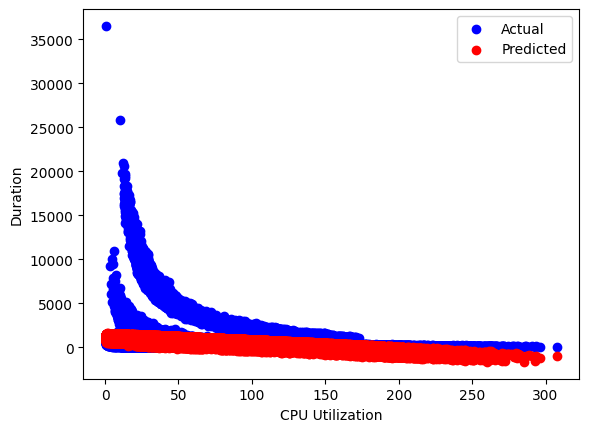

In [4]:
# Simple linear regression
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

X = df[['cpu_util', 'memory_util']]
Y = df['duration']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)

y_predicted = model.predict(X_test)
mse = mean_squared_error(y_test, y_predicted)
print(f"Mean squared error is: {mse}")

plt.scatter(X_test["cpu_util"], y_test, color='blue', label='Actual')
plt.scatter(X_test["cpu_util"], y_predicted, color='red', label='Predicted')
plt.xlabel('CPU Utilization')
plt.ylabel('Duration')
plt.legend()
plt.show()

Mean squared error is: 1.3409373036705883


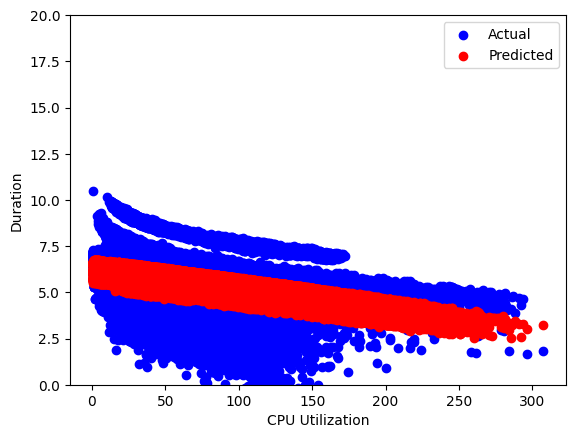

In [5]:
# Better logarithmic regression
df['log_duration'] = np.log(df['duration'])
X = df[['cpu_util', 'memory_util']]
Y = df['log_duration']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)

y_predicted = model.predict(X_test)
mse = mean_squared_error(y_test, y_predicted)
print(f"Mean squared error is: {mse}")

plt.scatter(X_test["cpu_util"], y_test, color='blue', label='Actual')
plt.scatter(X_test["cpu_util"], y_predicted, color='red', label='Predicted')
plt.xlabel('CPU Utilization')
plt.ylabel('Duration')
plt.ylim(0, 20)
plt.legend()
plt.show()

['readfile' 'sleep' 'imagecompress' 'decompress' 'json2yaml'
 'floatoperations' 'imagerotate' 'matmul' 'compress' 'writefile'
 'imageresize']


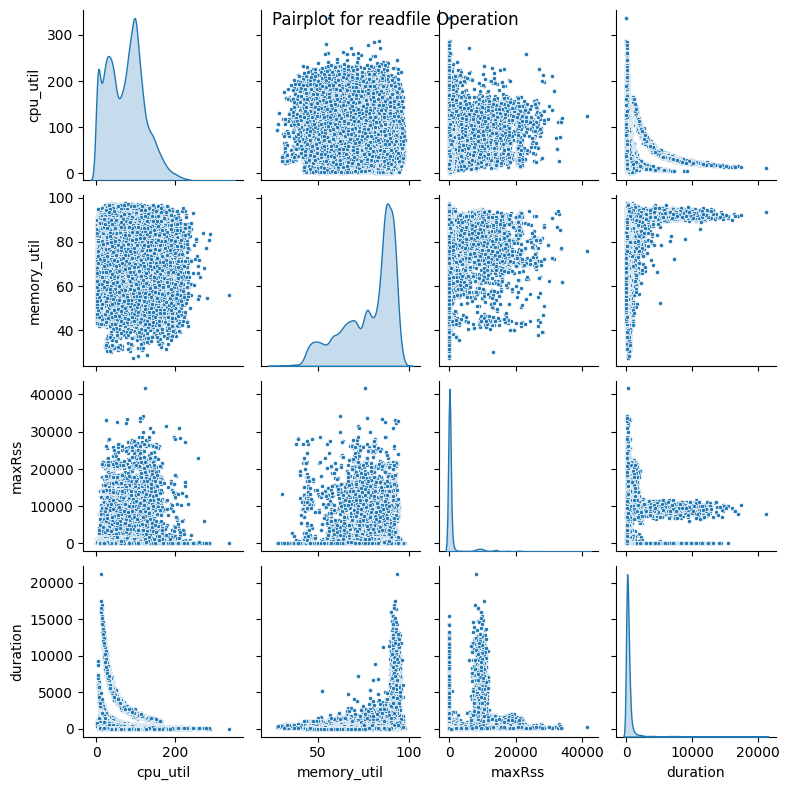

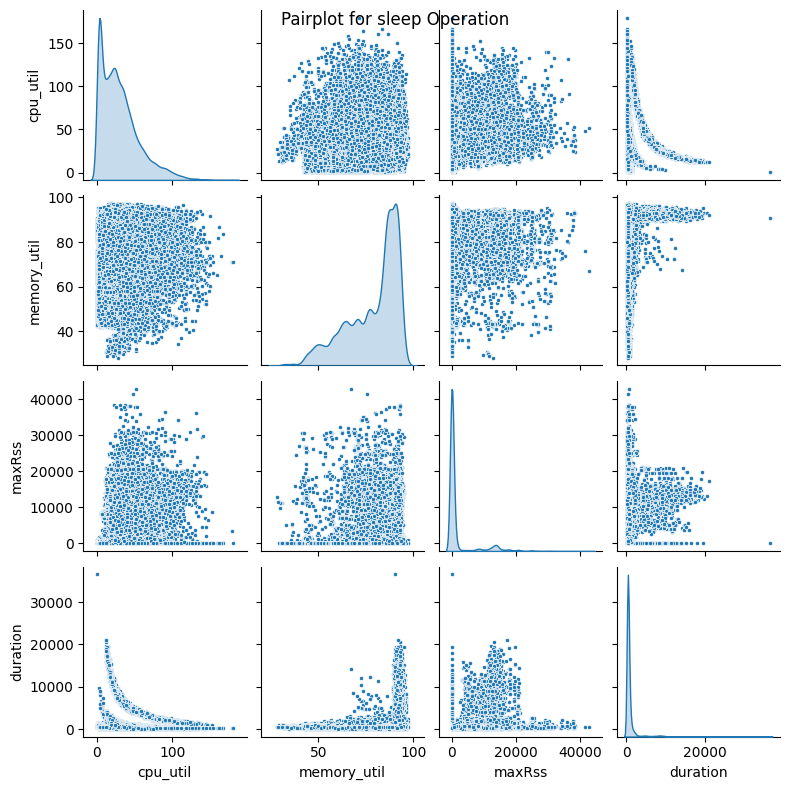

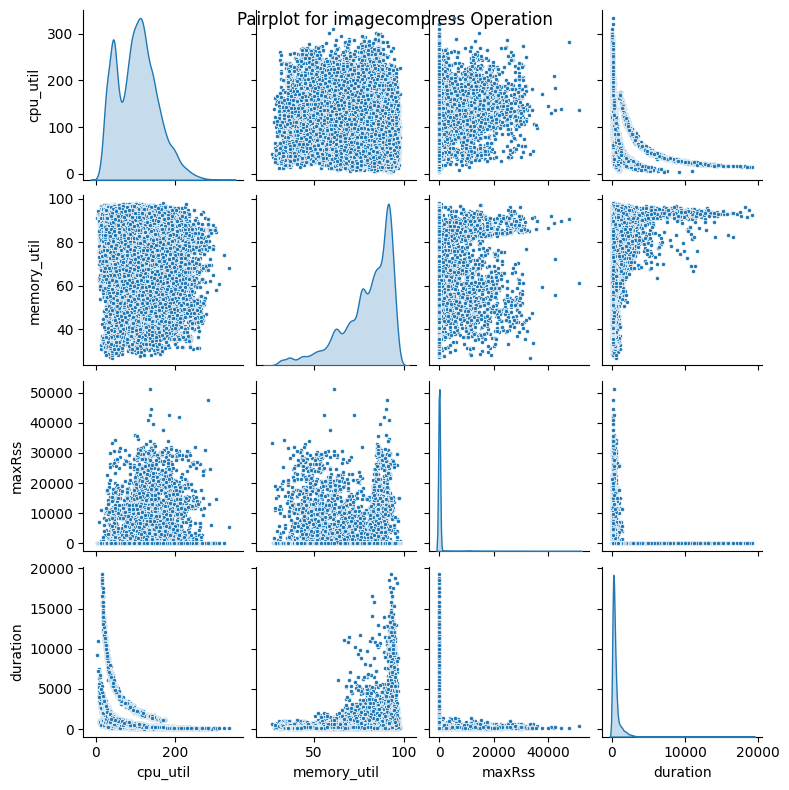

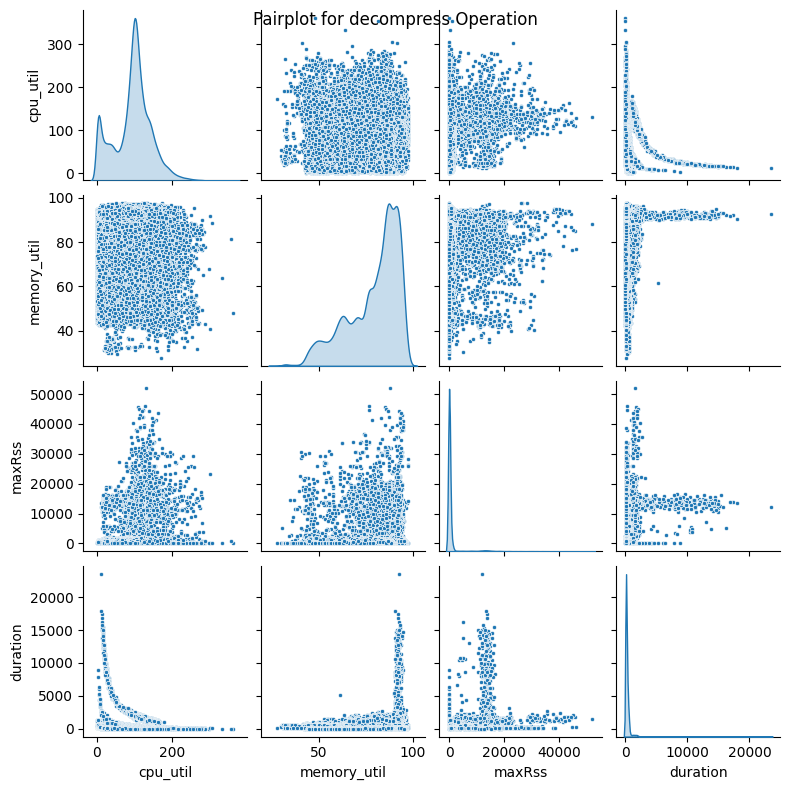

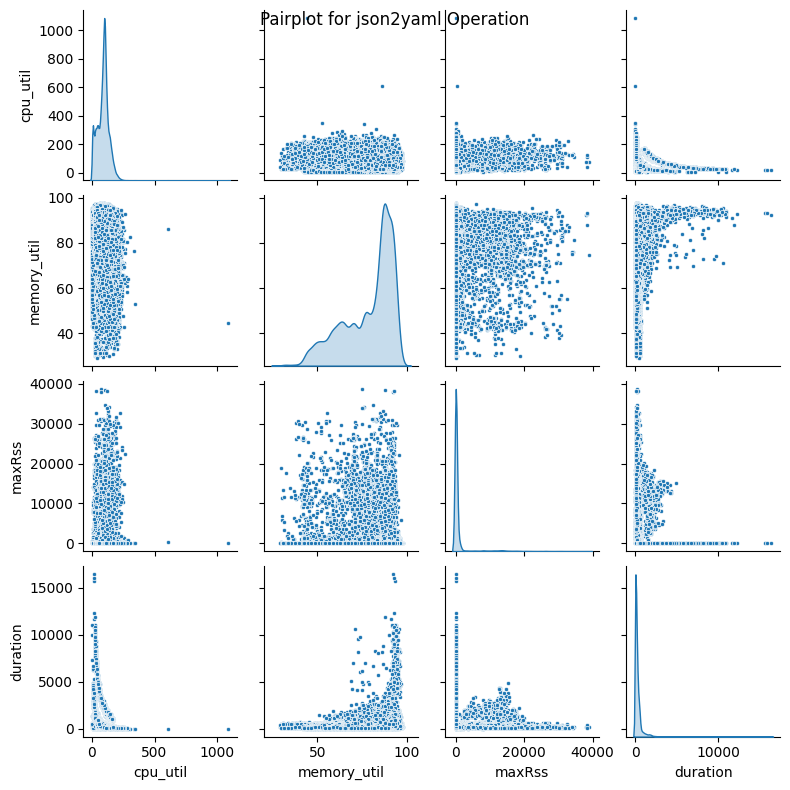

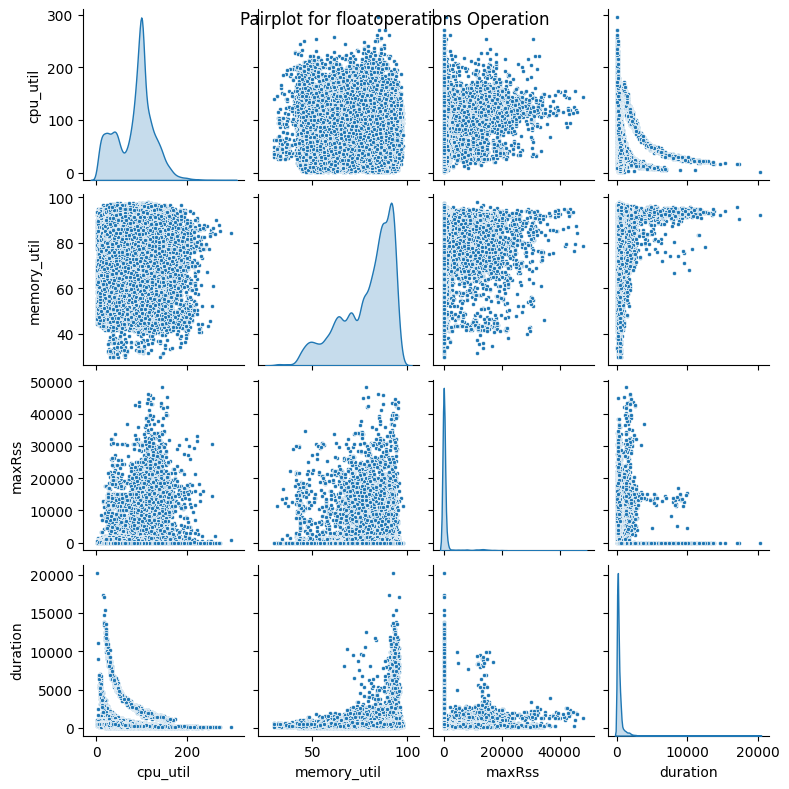

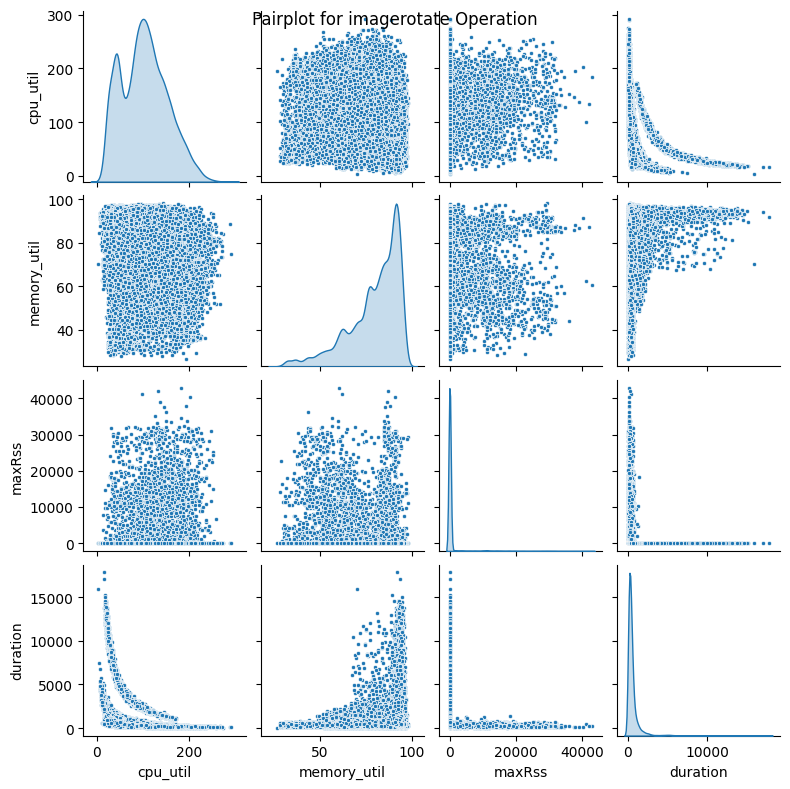

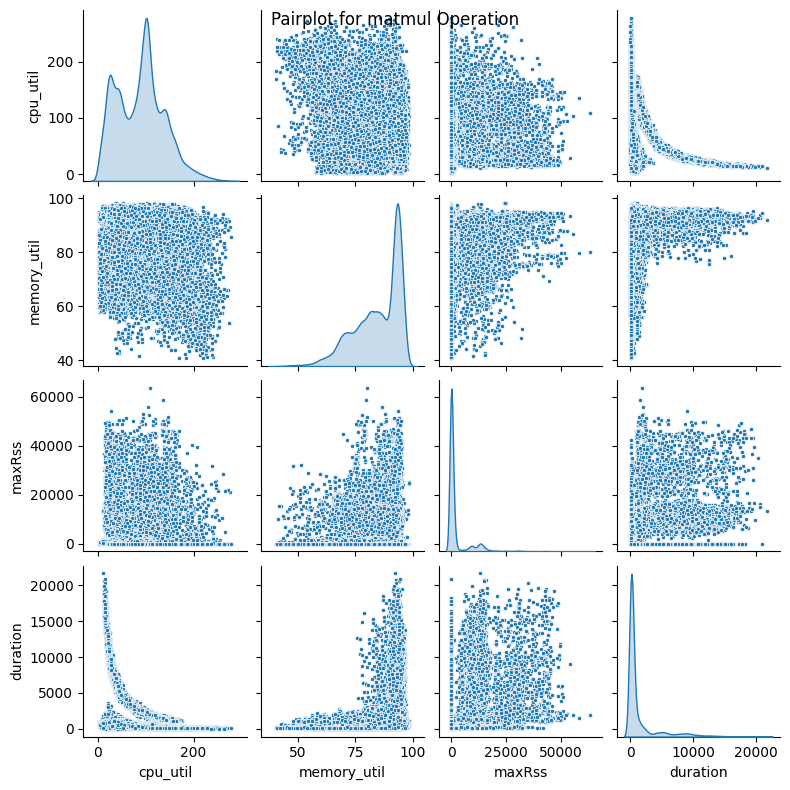

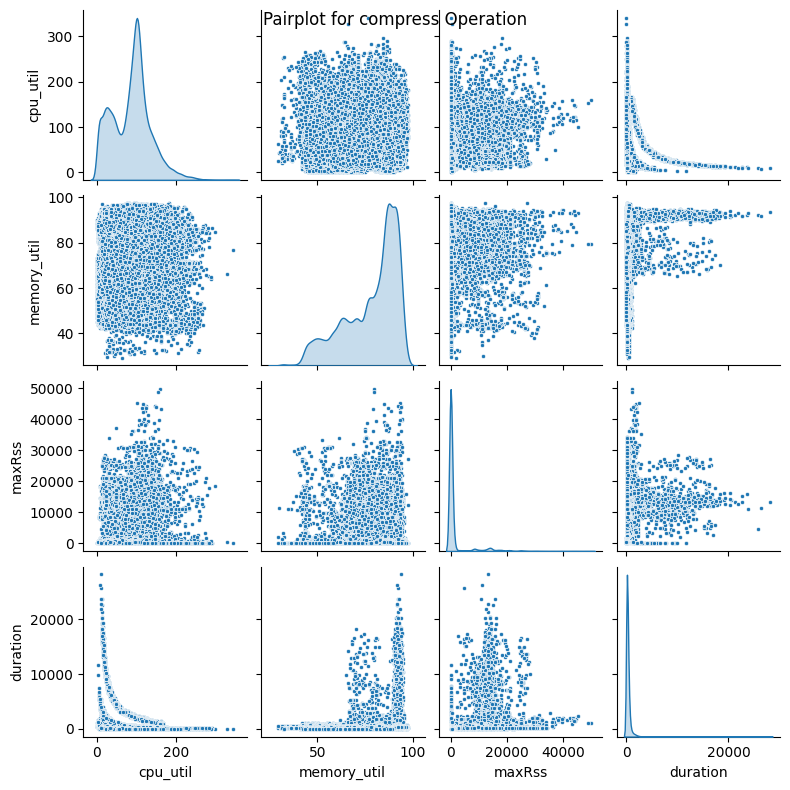

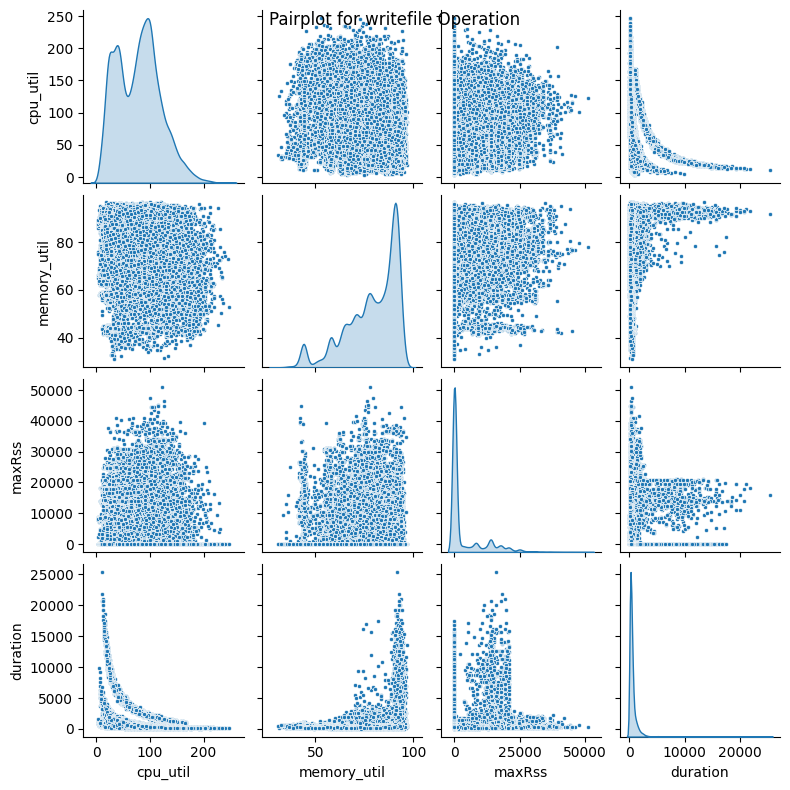

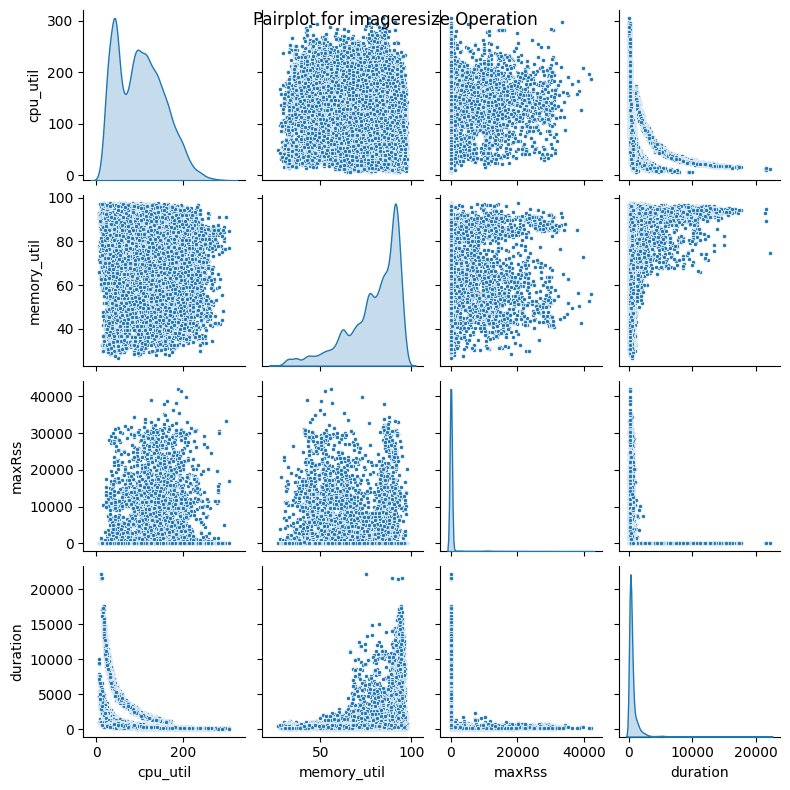

In [8]:
import warnings
warnings.filterwarnings('ignore')
operation_dataframes = {}
unique_operations = df['Operation'].unique()
print(unique_operations)
for operation in unique_operations:
    operation_dataframes[operation] = df[df['Operation'] == operation]

# Create pairplots
for operation, operation_df in operation_dataframes.items():
    # Here we can add the columns which are relevant, for all columns we can just do 'columns_to_include = df.columns'
    columns_to_include = ['cpu_util', 'memory_util', 'maxRss', 'duration']  
    sns.pairplot(operation_df[columns_to_include], diag_kind='kde', markers='.', height=2)
    plt.suptitle(f'Pairplot for {operation} Operation')
    plt.show()

# Create heatmaps
# for operation, operation_df in operation_dataframes.items():
#     # Calculate the correlation matrix
#     numerical_df = df.select_dtypes(include=['number'])
#     correlation_matrix = numerical_df.corr()

#     # Create a heatmap
#     plt.figure(figsize=(10, 8))  # Adjust the figure size as needed
#     sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
#     plt.title(f'Heatmap for {operation} Operation')
#     plt.show()